In [6]:
import json

with open('results.json') as f:
    results = json.load(f)

In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
def plot_instances(features):
    fig, axes = plt.subplots(1, 20)
    fig.set_size_inches(30, 5)
    for i, ax in enumerate(axes):
        image = plt.imread(features[i][0])
        label = float(features[i][1])
        # image = image / 255.0
        ax.set_title(f"{label:.3f}")
        ax.imshow(image)
        ax.set_axis_off()
    plt.show()

In [9]:
def visualize_concept(concept_id=0):
    print(f"Concept #{concept_id}")
    print()
    pair = results[concept_id]
    print(pair["concept"])
    plot_instances(pair["feature"])

Concept #0

[['blue', 0.5391605069239934], ['four', 0.33238945501606637], ['color', 0.17498732736904607], ['green', 0.13724082736222726], ['round', 0.08975897640959034], ['red', 0.08578257316617462], ['white', 0.07526075602480396], ['three', 0.06385285847676479], ['angle', 0.05933070882882287], ['shape', 0.050590451607899614]]


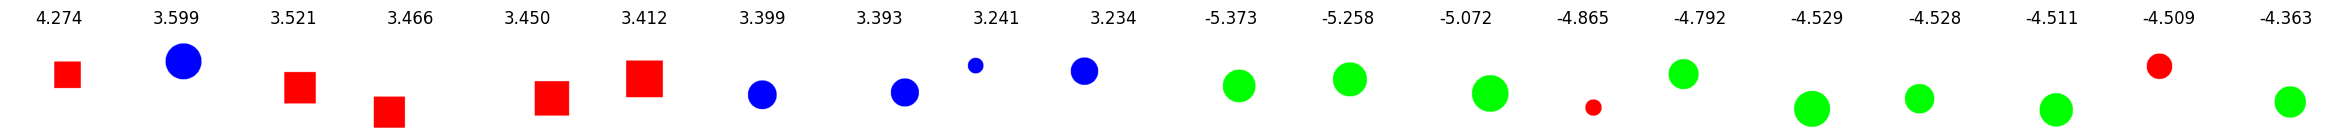

Concept #1

[['angle', 0.4216368155750802], ['shape', 0.16207693826538438], ['blue', 0.13833417061383163], ['left', 0.13405054139519135], ['red', 0.12754685311176914], ['up', 0.08106176719683258], ['blank', 0.07697445637066383], ['bottom', 0.07052382636128567], ['position', 0.0628447401047076], ['this', 0.05248725973372537]]


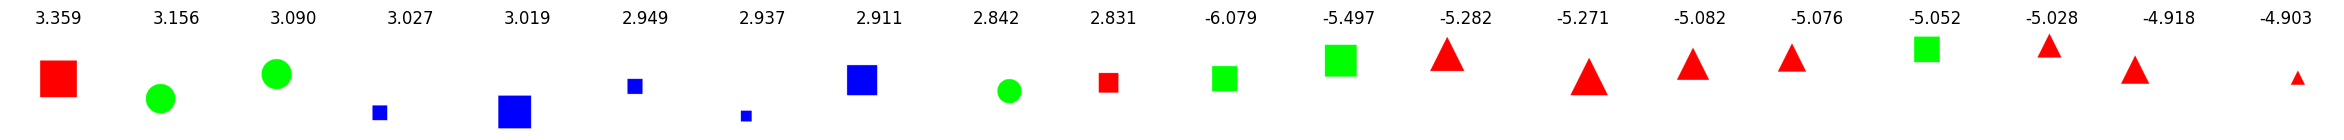

Concept #2

[['three', 0.7567128852130921], ['unrotate', 0.17837710721926975], ['rotate', 0.13064982764736083], ['round', 0.11503211225920576], ['position', 0.08455089234158922], ['up', 0.08389319150838617], ['color', 0.08124154205951425], ['bottom', 0.07236198959996815], ['has', 0.06807723372902084], ['red', 0.06632278005827248]]


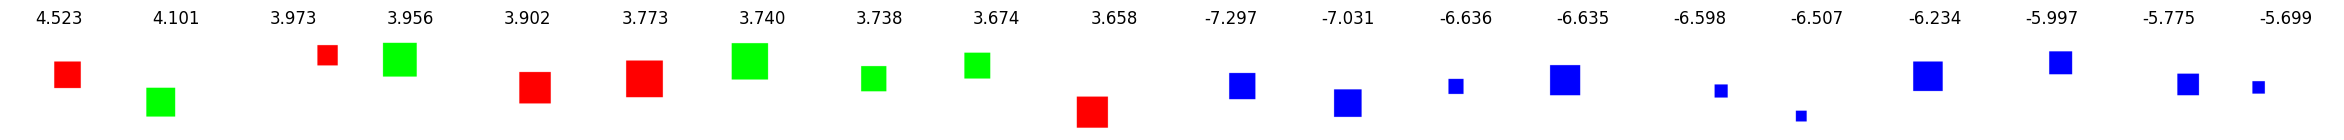

Concept #3

[['blue', 0.5068633272880461], ['color', 0.2359609312935654], ['canvas', 0.22835508290183576], ['red', 0.20542418893154074], ['blank', 0.11200821443742096], ['green', 0.08304510346000514], ['left', 0.08141004340383258], ['white', 0.0713984194332141], ['unrotate', 0.03204128927651171], ['angle', 0.03158419631663861]]


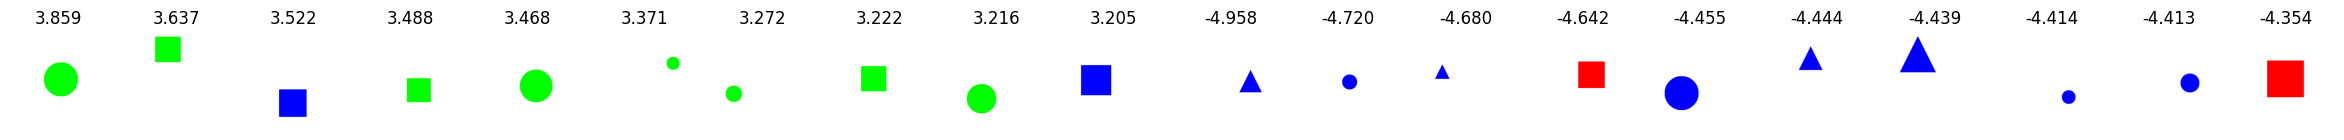

Concept #4

[['red', 0.6083042169004921], ['three', 0.5337620485846589], ['color', 0.24489347068491948], ['round', 0.23882126258156164], ['green', 0.20850306613847794], ['four', 0.1137531226606873], ['blue', 0.0712632650501905], ['has', 0.03634377502101829], ['white', 0.03551303631209174], ['is', 0.028357786788203852]]


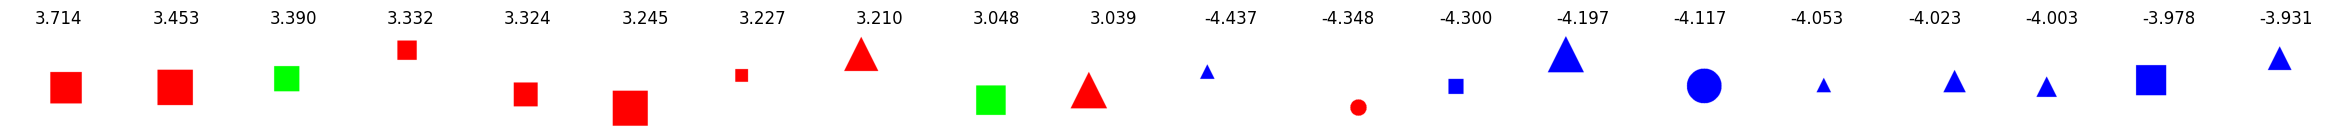

Concept #5

[['position', 0.581353646613718], ['unrotate', 0.11909155027523209], ['blue', 0.11813171591942873], ['rotate', 0.09108980241915689], ['left', 0.0707881742966001], ['up', 0.06652409877858255], ['bottom', 0.053864603499612404], ['red', 0.03450320372130813], ['has', 0.03410441746738383], ['canvas', 0.030532988427373453]]


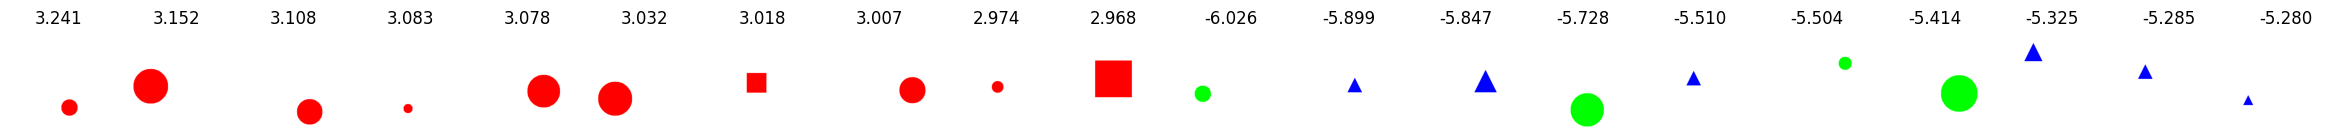

Concept #6

[['green', 0.3998524147320569], ['canvas', 0.1587449300701056], ['color', 0.15837851523101168], ['three', 0.14927380603503407], ['bottom', 0.11581671652292984], ['red', 0.09834172919816603], ['right', 0.0866129704946589], ['round', 0.08172969035501403], ['blue', 0.07306986407838702], ['has', 0.07142260487123234]]


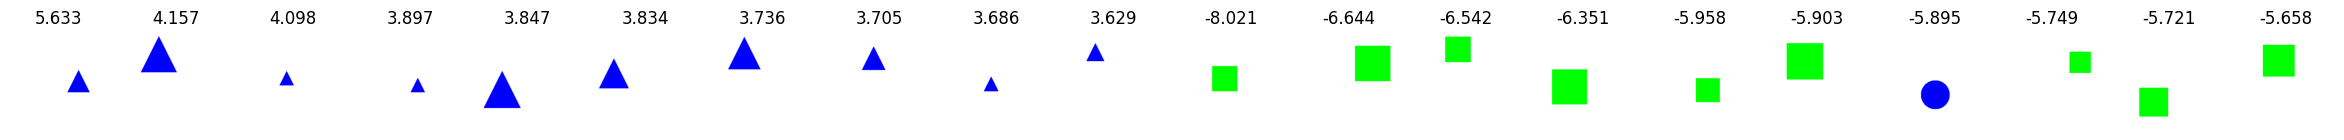

Concept #7

[['blue', 0.5712918701695233], ['red', 0.5044089892606546], ['color', 0.30403890933962613], ['three', 0.23915190949914902], ['four', 0.16900868921018228], ['green', 0.11093767436431358], ['position', 0.04055418334396551], ['round', 0.0396119896958514], ['white', 0.030740620033888173], ['rotate', 0.025636067359493964]]


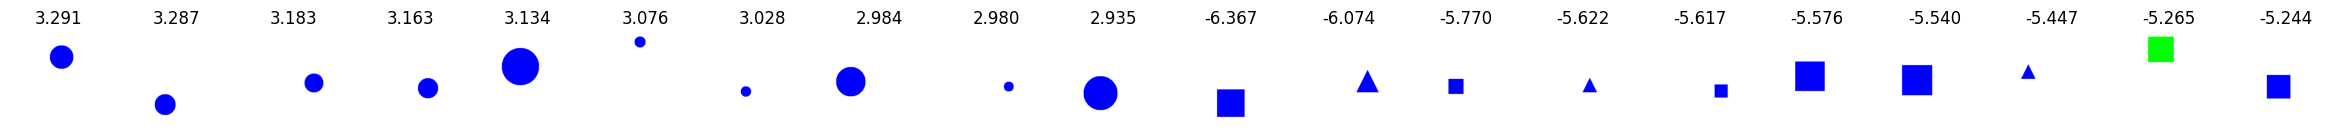

Concept #8

[['four', 0.5997745148050107], ['green', 0.4779980897418852], ['three', 0.2954929432733272], ['round', 0.2602051186125453], ['red', 0.09113548547029496], ['blue', 0.0695667486183527], ['shape', 0.06941615367424359], ['angle', 0.06496897304990912], ['canvas', 0.05344045366435678], ['is', 0.046144873376299696]]


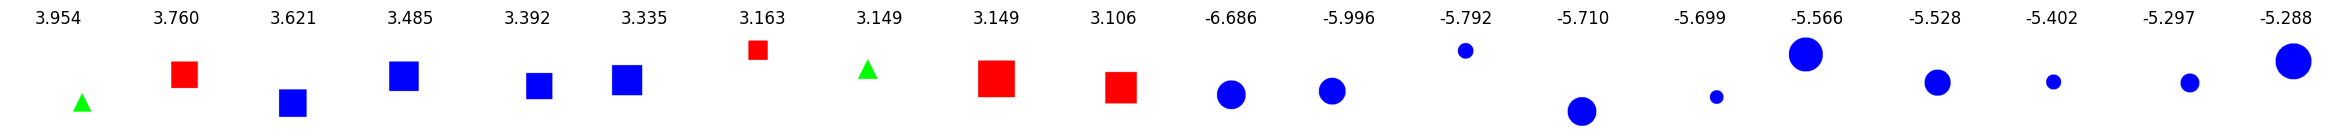

Concept #9

[['green', 0.6031781566700315], ['blue', 0.5717305960330537], ['three', 0.30496969688229447], ['color', 0.25349656989580893], ['red', 0.0935916296168556], ['round', 0.07754263959037579], ['is', 0.05581340640177572], ['left', 0.036847302609543796], ['four', 0.031686345587779836], ['white', 0.030228826094005692]]


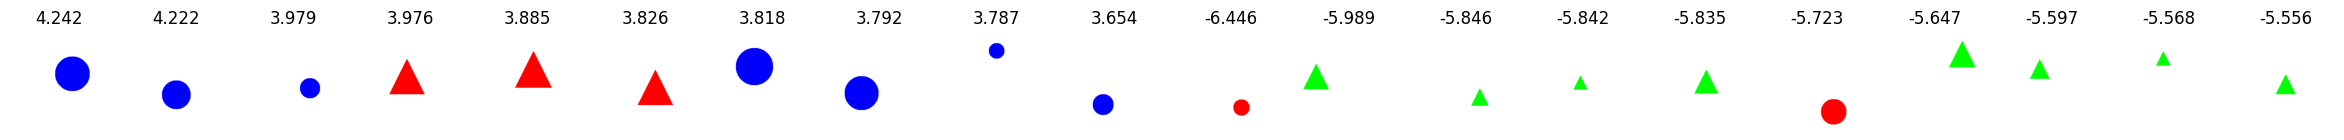

In [10]:
for i in range(10):
    visualize_concept(i)